# Graph based extraction

In [ ]:
import gensim.downloader as api
import os

# Ensure the directory exists
if not os.path.exists('data'):
    os.makedirs('data')

# Download a pre-trained Word2Vec model
model_name = "glove-wiki-gigaword-50"

# Download and load the model
model = api.load(model_name)

# Save the model
model.save('data/model.model')


In [ ]:
%load_ext autoreload
%autoreload 2
from nlp_utils import *
from KeywordExtractor import *

methods = {1: "degree_centrality", 2: "closeness_centrality", 3: "betweenness_centrality", 4:"eigenvector_centrality", 5:"pagerank"} #, \
           #6:"katz_centrality"} #, 7: "hits"}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Given abstract: 
The island country of Japan has developed into a great economy after World War 2. The Japan sea is a source of fish. Sushi is a famous fish and rice food.

Extracted tokens: 
['island', 'country', 'japan', 'great', 'economy', 'world', 'war', 'japan', 'sea', 'source', 'fish', 'sushi', 'famous', 'fish', 'rice', 'food']

Extracted sentences: 
[['island', 'country', 'japan', 'great', 'economy', 'world', 'war'], ['japan', 'sea', 'source', 'fish'], ['sushi', 'famous', 'fish', 'rice', 'food']]

Co-occurrences: 
{('country', 'island'): 1, ('island', 'japan'): 1, ('country', 'japan'): 2, ('country', 'great'): 1, ('great', 'japan'): 2, ('economy', 'japan'): 1, ('economy', 'great'): 2, ('great', 'world'): 1, ('economy', 'world'): 2, ('economy', 'war'): 1, ('war', 'world'): 1, ('japan', 'sea'): 1, ('japan', 'source'): 1, ('sea', 'source'): 2, ('fish', 'sea'): 1, ('fish', 'source'): 1, ('famous', 'sushi'): 1, ('fish', 'sushi'): 1, ('famous', 'fish'): 2, ('famous', 'rice'): 1, ('fis

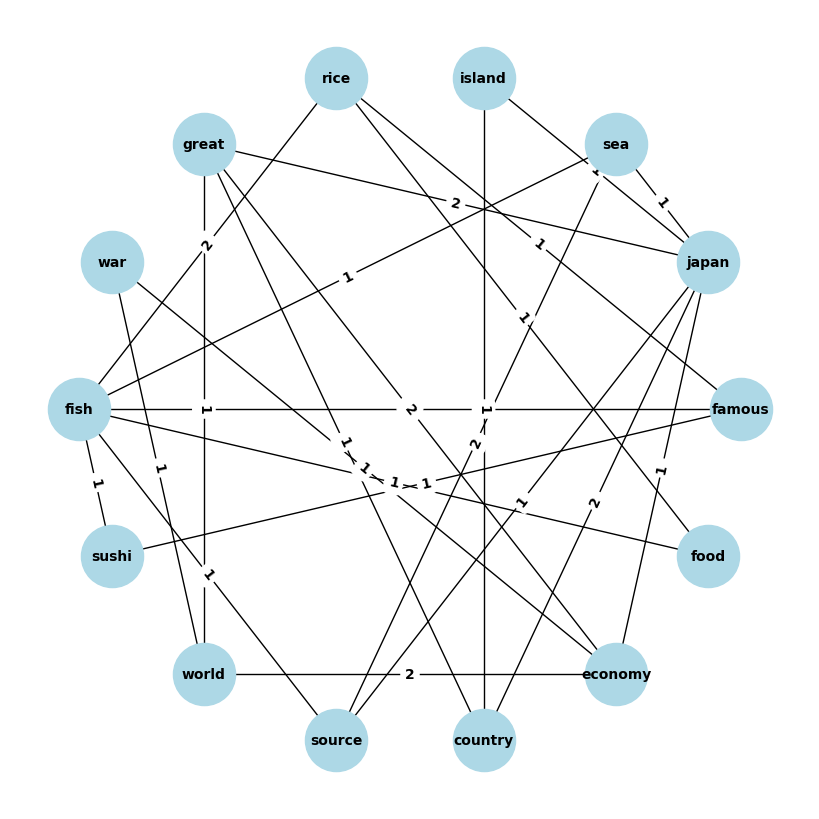

In [ ]:
abstract = "The island country of Japan has developed into a great economy after World War 2. \
The Japan sea is a source of fish. Sushi is a famous fish and rice food."
ke = KeywordExtractor(abstract=abstract, window_size=3)
print(f"Given abstract: \n{abstract}\n")
print(f"Extracted tokens: \n{ke.tokens}\n")
print(f"Extracted sentences: \n{ke.sentences}\n")
print(f"Co-occurrences: \n{ke.co}\n")

keyword_dict = ke.order_nodes(method=methods[12], to_print=False) # done with method 5, pagerank
print(f"Keyword extraction scores: \n{keyword_dict}\n")
predicted_keywords = list(keyword_dict.keys())[:5]
print(f"The predicted keywords are: \n{predicted_keywords}")

ke.visualize_graph()

# Context based extraction

In [ ]:
!pip install keybert

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 7.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cache

In [ ]:
import pandas as pd

# Load the data
data = pd.read_csv('/content/extracted_keywords_abstracts.csv')

# Display the first few rows of the dataframe
data.head()


,Abstract,Keywords
0,background : the present study was carried ou...,"intervention, advocacy, school, girls, boys"
1,backgroundanemia in patients with cancer who ...,"dl, iron, patients, hemoglobin, weeks"
2,tardive dystonia ( td ) is a serious side eff...,"td, antipsychotics, atypical, temperament, hyp..."
3,many lepidopteran insects are agricultural pe...,"amp, pest, insect, lepidopteran, immunity"
4,we present an unusual case of recurrent cough...,"cough, syncope, syncopal, intracranial, flow"


In [ ]:
!pip install nltk spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 81.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import pandas as pd
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('punkt')
nltk.download('stopwords')

# Load English tokenizer, tagger, parser, NER, and word vectors
nlp = spacy.load("en_core_web_sm")

# Function to preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenization
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Stemming
    stemmer = PorterStemmer()
    stemmed = [stemmer.stem(word) for word in tokens]
    # Lemmatization
    lemmatized = [nlp(word)[0].lemma_ for word in stemmed]
    return ' '.join(lemmatized)

# Apply preprocessing to the Abstract column
data['Processed_Abstract'] = data['Abstract'].apply(preprocess_text)

# Display the first few rows of the dataframe
data[['Abstract', 'Processed_Abstract']].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Abstract,Processed_Abstract
0,background : the present study was carried ou...,background present studi carri assess effect c...
1,backgroundanemia in patients with cancer who ...,backgroundanemia patient cancer undergo activ ...
2,tardive dystonia ( td ) is a serious side eff...,tardiv dystonia td seriou side effect antipsyc...
3,many lepidopteran insects are agricultural pe...,mani lepidopteran insect agricultur pest affec...
4,we present an unusual case of recurrent cough...,present unusu case recurr cough syncop 43year ...


In [ ]:
processed_file_path = '/content/extracted_keywords_abstracts_preprocesses.csv'
data.to_csv(processed_file_path, index=False)

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch

# Load the SciBERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("allenai/scibert_scivocab_uncased")
model = AutoModel.from_pretrained("allenai/scibert_scivocab_uncased")

# Function to generate context embeddings
def get_context_embeddings(text):
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=2048)

    # Get the embeddings from the last hidden layer
    with torch.no_grad():
        outputs = model(**inputs)
        embeddings = outputs.last_hidden_state

    # Aggregate the token embeddings to get a single context embedding (e.g., mean pooling)
    context_embedding = torch.mean(embeddings, dim=1)
    return context_embedding

# Example usage
text = data['Processed_Abstract'][0]
context_embedding = get_context_embeddings(text)
print("Context embedding shape:", context_embedding.shape)
print(context_embedding)

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/228k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/442M [00:00<?, ?B/s]

Context embedding shape: torch.Size([1, 768])
tensor([[ 3.0572e-01,  1.6484e-01, -9.8583e-02,  4.2958e-01,  6.4448e-02,
          2.0854e-01,  2.5520e-01,  7.8224e-02, -3.5423e-01,  3.2740e-01,
          4.8053e-01,  2.2145e-03, -3.8457e-01, -7.1701e-01, -7.2492e-01,
          3.1801e-01,  4.8386e-01,  6.8569e-01,  1.5293e-01, -7.4974e-02,
          6.7233e-02, -4.4037e-01, -7.4689e-01, -1.3369e-01,  4.9506e-01,
         -2.7438e-01,  3.9675e-01,  2.7940e-01,  7.6407e-03, -1.0547e-01,
         -5.3443e-01, -1.3957e-01, -3.6628e-01, -1.2863e+00, -1.7088e-01,
          2.0140e-01,  1.0673e+00, -4.5978e-01,  1.0465e-01,  3.0498e-01,
          3.5313e-01, -9.5475e-01,  9.2381e-01,  1.2266e-01, -3.0668e-01,
          9.3097e-01, -1.9624e-01,  4.0007e-01,  4.8246e-02, -2.5310e-01,
          8.1404e-02, -5.9870e-01,  2.5640e-01,  1.0705e+00,  1.1312e+00,
         -4.4135e-01, -5.5997e-01, -1.2004e+00,  2.5183e-01,  1.5074e-01,
          3.3272e-02,  5.3878e-01,  1.3296e-01,  3.8572e-02, -5.61

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
from keybert import KeyBERT
import numpy as np

# Load the SciBERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("allenai/scibert_scivocab_uncased")
model = AutoModel.from_pretrained("allenai/scibert_scivocab_uncased")

# Function to generate context embeddings
def get_context_embeddings(text):
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=2048)

    # Get the embeddings from the last hidden layer
    with torch.no_grad():
        outputs = model(**inputs)
        embeddings = outputs.last_hidden_state

    # Aggregate the token embeddings to get a single context embedding (e.g., mean pooling)
    context_embedding = torch.mean(embeddings, dim=1)
    return context_embedding

# Initialize KeyBERT with a custom embedding model
class SciBERTEmbeddingModel:
    def encode(self, documents, **kwargs):
        return np.array([get_context_embeddings(doc).numpy()[0] for doc in documents])

model = SciBERTEmbeddingModel()
kw_model = KeyBERT(model=SciBERTEmbeddingModel())




modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.12k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
data = pd.read_csv('/content/extracted_keywords_abstracts_preprocesses.csv')


In [ ]:
data.head(2)

,Abstract,Keywords,Processed_Abstract
0,background : the present study was carried ou...,"intervention, advocacy, school, girls, boys",background present studi carri assess effect c...
1,backgroundanemia in patients with cancer who ...,"dl, iron, patients, hemoglobin, weeks",backgroundanemia patient cancer undergo activ ...


In [ ]:
# Example usage
document = data['Processed_Abstract'][2]
keywords11 = kw_model.extract_keywords(document, keyphrase_ngram_range=(1, 1), stop_words='english', top_n=15)
# keywords12 = kw_model.extract_keywords(document, keyphrase_ngram_range=(1, 5), stop_words='english', top_n=10)

# print("Extracted Keywords11:")
# for keyword, score in keywords11:
#     print(f"{keyword}: {score}")
# print("\n\n")
# print("Extracted Keywords12:")
# for keyword, score in keywords12:
#     print(f"{keyword}: {score}")

keywords11

[('antipsychot', 0.5829),
 ('dose', 0.3589),
 ('psychot', 0.3498),
 ('effect', 0.3139),
 ('low', 0.3136),
 ('tardiv', 0.3109),
 ('affect', 0.3058),
 ('patient', 0.3019),
 ('lower', 0.266),
 ('atyp', 0.2567),
 ('hyperthym', 0.254),
 ('dystonia', 0.2536),
 ('brain', 0.2472),
 ('medic', 0.2314),
 ('prone', 0.2313)]

Given abstract: 
 tardive dystonia ( td ) is a serious side effect of antipsychotic medications , more with typical antipsychotics , that is potentially irreversible in affected patients . 
 studies show that newer atypical antipsychotics have a lower risk of td . as a result , many clinicians may have developed a false sense of security when prescribing these medications . 
 we report a case of 20-year - old male with hyperthymic temperament and borderline intellectual functioning , who developed severe td after low dose short duration exposure to atypical antipsychotic risperidone and then olanzapine . 
 the goal of this paper is to alert the reader to be judicious and cautious before using casual low dose second generation antipsychotics in patient with no core psychotic features , hyperthymic temperament , or borderline intellectual functioning suggestive of organic brain damage , who are more prone to develop adverse effects such as td and monitor the onset of td in patients takin

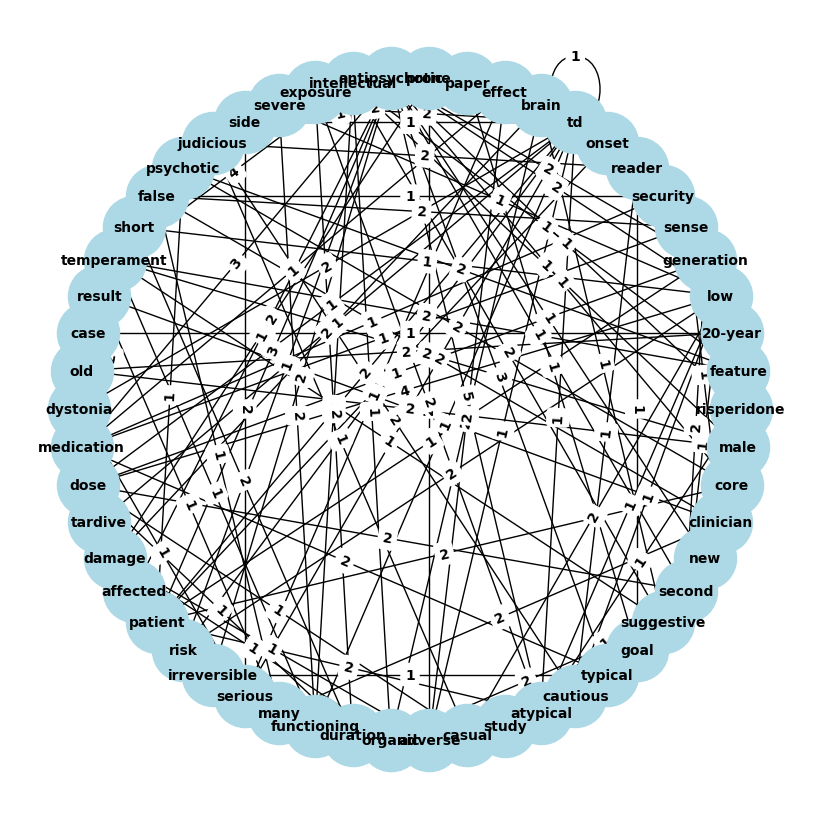

In [ ]:
abstract = data['Abstract'][2]
ke = KeywordExtractor(abstract=abstract, window_size=3)
print(f"Given abstract: \n{abstract}\n")
print(f"Extracted tokens: \n{ke.tokens}\n")
print(f"Extracted sentences: \n{ke.sentences}\n")
print(f"Co-occurrences: \n{ke.co}\n")

keyword_dict = ke.order_nodes(method=methods[3], to_print=False) # done with method 5, pagerank
print(f"Keyword extraction scores: \n{keyword_dict}\n")
predicted_keywords = list(keyword_dict.keys())[:10]
print(f"The predicted keywords are: \n{predicted_keywords}")

ke.visualize_graph()

# Combine the results

In [ ]:
from collections import Counter

# Keywords from method 1
keywords_method1 = keywords11

# Keywords from method 2
keywords_method2 = predicted_keywords

# Extract keyword names from method 1
keywords1 = [keyword for keyword, score in keywords_method1]

# Combine all keywords
all_keywords = keywords1 + keywords_method2

# Use Counter to get the most common unique keywords
keyword_counts = Counter(all_keywords)
top_keywords = keyword_counts.most_common(7)

# Output the top 10 unique keywords
for keyword, count in top_keywords:
    print(f"{keyword}: {count}")


dose: 2
effect: 2
low: 2
patient: 2
antipsychot: 1
psychot: 1
tardiv: 1


In [ ]:
data['Keywords'][2]

'dl, iron, patients, hemoglobin, weeks'